In [99]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [100]:
df = pd.read_csv("meteo_data.csv")
df.index = pd.to_datetime(df.DATE)
del df['DATE']

required_cols = ['HC_AIR_TEMPERATURE']
df = df[required_cols]
df

,HC_AIR_TEMPERATURE
DATE,
2022-10-26 22:00:00,13.39
2022-10-26 23:00:00,13.52
2022-10-27 00:00:00,13.64
2022-10-27 01:00:00,13.59
2022-10-27 02:00:00,13.63
...,...
2024-05-22 17:00:00,27.16
2024-05-22 18:00:00,26.46
2024-05-22 19:00:00,25.16


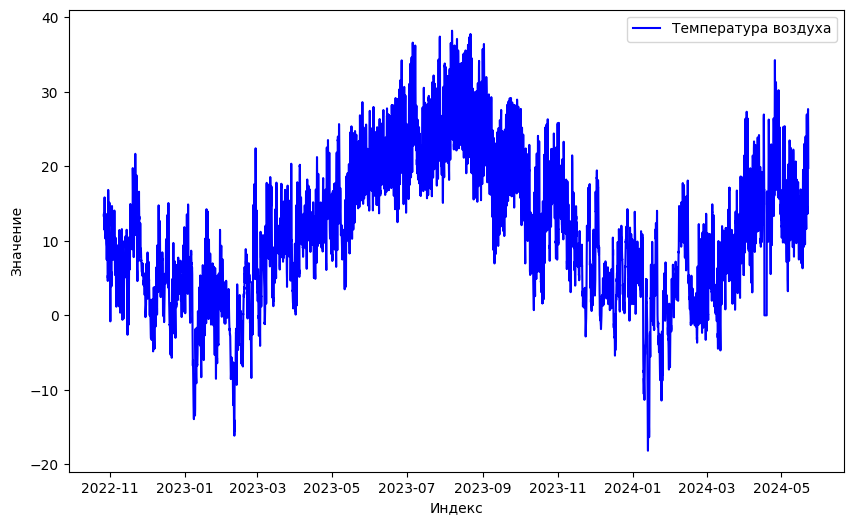

In [101]:
temp = df['HC_AIR_TEMPERATURE']

plt.figure(figsize=(10, 6))
plt.plot(df['HC_AIR_TEMPERATURE'], label='Температура воздуха', color='blue')

# Настройка графика
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()

# Показать график
plt.show()

In [102]:
# [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]   [11]
# [[2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]  [12]
# [[3], [4], [5], [6], [7], [8], [9], [10], [11], [12]] [13]
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [103]:
WINDOW_SIZE = 10
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
print(X1.shape, y1.shape)

(13753, 10, 1) (13753,)


In [104]:
X_train1, y_train1 = X1[:10500], y1[:10500]
X_val1, y_val1 = X1[10500:11800], y1[10500:11800]
X_test1, y_test1 = X1[11800:], y1[11800:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((10500, 10, 1), (10500,), (1300, 10, 1), (1300,), (1953, 10, 1), (1953,))

In [105]:
model2 = Sequential()
model2.add(InputLayer((WINDOW_SIZE, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 9, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │           4,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# Настройки обратного вызова и компиляции модели
cp2 = ModelCheckpoint('model2/model2-temperature.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [107]:
# Обучение модели
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp2])

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 86.4321 - root_mean_squared_error: 9.0004 - val_loss: 8.1191 - val_root_mean_squared_error: 2.8426
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.8198 - root_mean_squared_error: 3.2879 - val_loss: 4.4566 - val_root_mean_squared_error: 2.1066
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4183 - root_mean_squared_error: 2.5320 - val_loss: 2.7416 - val_root_mean_squared_error: 1.6536
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9467 - root_mean_squared_error: 1.9855 - val_loss: 1.8238 - val_root_mean_squared_error: 1.3489
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6216 - root_mean_squared_error: 1.6185 - val_loss: 1.3006 - val_root_mean_squared_error: 1.1393
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8561 - root_mean_squared_error: 1.3621 - val_loss: 1.0505 - val_root_mean_squared_error: 1.0239
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [108]:
# Прогнозирование на тестовых данных
y_pred = model2.predict(X_test1)

# Вывод предсказаний
print(y_pred)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 4.2463155]
 [ 6.0056295]
 [ 8.170831 ]
 ...
 [25.522795 ]
 [24.117678 ]
 [20.759396 ]]


In [112]:
# Прогнозирование на будущее
def predict_future(model, last_known_data, last_known_dates, steps=3, window_size=10):
    predictions = []
    future_dates = pd.date_range(start=last_known_dates[-1], periods=steps + 1, freq='h')[1:]
    
    current_data = last_known_data.tolist()
    
    for _ in range(steps):
        input_data = np.array(current_data[-window_size:]).reshape(1, window_size, 1)
        prediction = model.predict(input_data)
        predictions.append(prediction[0, 0])
        current_data.append(prediction[0, 0])
    
    return future_dates, predictions

# Последние известные данные и даты
last_known_data = temp.values[-WINDOW_SIZE:]
last_known_dates = temp.index[-WINDOW_SIZE:]

# Прогнозирование на 3 шага вперед
future_steps = 3
future_dates, predictions = predict_future(model2, last_known_data, last_known_dates, future_steps, WINDOW_SIZE)

# Вывод предсказаний с датами
for date, pred in zip(future_dates, predictions):
    print(f"{date}: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2024-05-22 22:00:00: 18.444847106933594
2024-05-22 23:00:00: 17.766231536865234
2024-05-23 00:00:00: 17.483705520629883


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


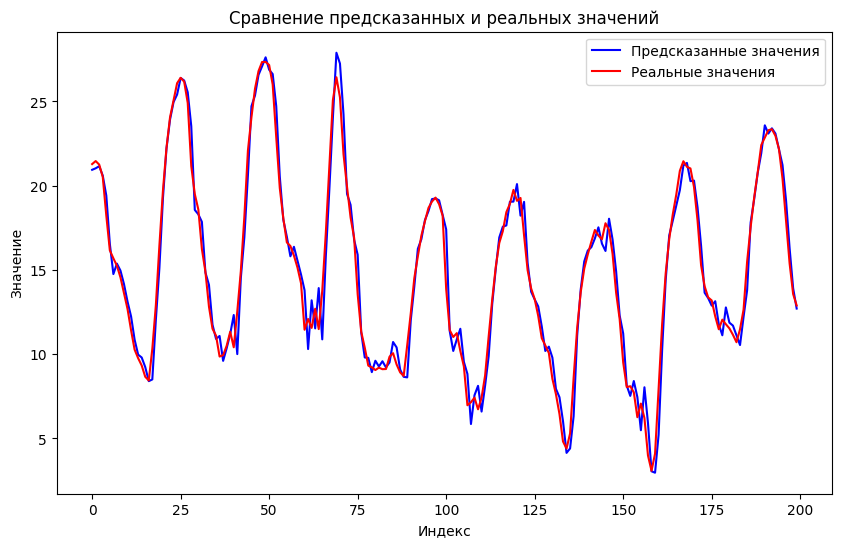

In [110]:
# Предсказание на тестовом наборе данных
y_pred1 = model2.predict(X_test1)

# Построение графика предсказанных и реальных значений
plt.figure(figsize=(10, 6))
plt.plot(y_pred1[700:900], label='Предсказанные значения', color='blue')
plt.plot(y_test1[700:900], label='Реальные значения', color='red')
plt.title('Сравнение предсказанных и реальных значений')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [111]:
# Оценка MAE
mae = mean_absolute_error(y_test1, y_pred1)

# Оценка MSE
mse = mean_squared_error(y_test1, y_pred1)

# Оценка RMSE
rmse = np.sqrt(mse)

# Оценка R^2
r2 = r2_score(y_test1, y_pred1)

print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя квадратичная ошибка (MSE):", mse)
print("Корень из среднеквадратичной ошибки (RMSE):", rmse)
print("Коэффициент детерминации (R^2):", r2)

Средняя абсолютная ошибка (MAE): 0.5848207983787372
Средняя квадратичная ошибка (MSE): 1.0469279872075319
Корень из среднеквадратичной ошибки (RMSE): 1.0231949898272235
Коэффициент детерминации (R^2): 0.9783099409304474
